In [85]:
%cd ../../GHDHI/TDA-tutorial/
import gudhi as gd

import numpy as np
import pandas as pd
import pickle as pickle
from matplotlib import pyplot as plt

/home/gonzalo/PhD-Code/GHDHI/TDA-tutorial


### Filtrations

In [2]:
st = gd.SimplexTree()

In [3]:
st.insert([0, 1])
st.insert([1, 2])
st.insert([3, 1])
st.insert([0, 1, 3])

True

In [4]:
for splx in st.get_filtration()  :
    print(splx)

([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([0, 3], 0.0)
([1, 3], 0.0)
([0, 1, 3], 0.0)


In [5]:
st.dimension()

2

In [6]:
st.num_vertices()

4

In [7]:
for i in st.get_skeleton(1):
    print(i)

([0, 1], 0.0)
([0, 3], 0.0)
([0], 0.0)
([1, 2], 0.0)
([1, 3], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)


In [8]:
st.insert([0, 1, 2], filtration = 0.1)

True

In [9]:
st_gen = st.get_filtration() 

for splx in st_gen :
    print(splx)

([0], 0.0)
([1], 0.0)
([0, 1], 0.0)
([2], 0.0)
([1, 2], 0.0)
([3], 0.0)
([0, 3], 0.0)
([1, 3], 0.0)
([0, 1, 3], 0.0)
([0, 2], 0.1)
([0, 1, 2], 0.1)


---
### Simplicial complexes from datapoints (*Rips filtration*)


In [8]:
f = open("./datasets/data_acc","rb")
data = pickle.load(f)    
f.close()

In [14]:
data_A = data[0]
data_B = data[1] 
data_C = data[2]
label  = data[3]

print(label)
print(np.shape(data_A))

['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A'
 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C'
 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C' 'C

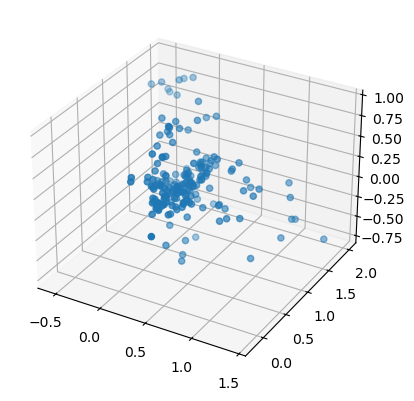

In [ ]:
data_A_sample = data_A[0]
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(data_A_sample[:, 0], data_A_sample[:, 1], data_A_sample[:, 2])

In [ ]:
# Makes the 1-skeleton of the point cloud:
skeleton = gd.RipsComplex(points = data_A_sample, max_edge_length = 0.2)

# Makes a tree with the filtration:
Rips_simplex_tree_sample = skeleton.create_simplex_tree(max_dimension = 3)

In [52]:
Rips_simplex_tree_sample.dimension()

3

In [51]:
Rips_simplex_tree_sample.num_vertices()

200

In [60]:
Rips_simplex_tree_sample.num_simplices()

27851

In [77]:
# Gets the filtration of the Rips complex:
rips_generator = Rips_simplex_tree_sample.get_filtration()

rips_list = list(rips_generator)
for splx in rips_list[0:300] :
    print(splx)

([0], 0.0)
([1], 0.0)
([2], 0.0)
([3], 0.0)
([4], 0.0)
([5], 0.0)
([6], 0.0)
([7], 0.0)
([8], 0.0)
([9], 0.0)
([10], 0.0)
([11], 0.0)
([12], 0.0)
([13], 0.0)
([14], 0.0)
([15], 0.0)
([16], 0.0)
([17], 0.0)
([18], 0.0)
([19], 0.0)
([20], 0.0)
([21], 0.0)
([22], 0.0)
([23], 0.0)
([24], 0.0)
([25], 0.0)
([26], 0.0)
([27], 0.0)
([28], 0.0)
([29], 0.0)
([30], 0.0)
([31], 0.0)
([32], 0.0)
([33], 0.0)
([34], 0.0)
([35], 0.0)
([36], 0.0)
([37], 0.0)
([38], 0.0)
([39], 0.0)
([40], 0.0)
([41], 0.0)
([42], 0.0)
([43], 0.0)
([44], 0.0)
([45], 0.0)
([46], 0.0)
([47], 0.0)
([48], 0.0)
([49], 0.0)
([50], 0.0)
([51], 0.0)
([52], 0.0)
([53], 0.0)
([54], 0.0)
([55], 0.0)
([56], 0.0)
([57], 0.0)
([58], 0.0)
([59], 0.0)
([60], 0.0)
([61], 0.0)
([62], 0.0)
([63], 0.0)
([64], 0.0)
([65], 0.0)
([66], 0.0)
([67], 0.0)
([68], 0.0)
([69], 0.0)
([70], 0.0)
([71], 0.0)
([72], 0.0)
([73], 0.0)
([74], 0.0)
([75], 0.0)
([76], 0.0)
([77], 0.0)
([78], 0.0)
([79], 0.0)
([80], 0.0)
([81], 0.0)
([82], 0.0)
([83], 0.0)
([

---
### Persistent homology and persistence diagrams

In [78]:
# Load dataset with Pandas:
path_file = "./datasets/Corr_ProteinBinding/"
files_list = [
    '1anf.corr_1.txt', 
    '1ez9.corr_1.txt', 
    '1fqa.corr_2.txt', 
    '1fqb.corr_3.txt', 
    '1fqc.corr_2.txt', 
    '1fqd.corr_3.txt', 
    '1jw4.corr_4.txt', 
    '1jw5.corr_5.txt', 
    '1lls.corr_6.txt', 
    '1mpd.corr_4.txt', 
    '1omp.corr_7.txt', 
    '3hpi.corr_5.txt', 
    '3mbp.corr_6.txt', 
    '4mbp.corr_7.txt'
]
corr_list = [
    pd.read_csv(
        path_file + u, 
        header = None, 
        sep='\s+'
    ) for u in files_list
]

dist_list = [1 - np.abs(c) for c in corr_list]

<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_11250/1622167380.py:23: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+'


In [79]:
D0 = dist_list[0]
D0.head()

,0,1,2,3,4,5,6,7,8,9,...,360,361,362,363,364,365,366,367,368,369
0,0.000000,0.076200,0.171364,0.378207,0.461747,0.493499,0.478665,0.432338,0.568455,0.639504,...,0.694159,0.723059,0.660802,0.614051,0.660601,0.686334,0.640850,0.617944,0.695108,0.748451
1,0.076200,0.000000,0.122763,0.233837,0.350744,0.406213,0.425202,0.381799,0.541636,0.646580,...,0.817461,0.844610,0.781266,0.740222,0.793586,0.808770,0.754748,0.730646,0.804961,0.848953
2,0.171364,0.122763,0.000000,0.084642,0.131528,0.148980,0.162259,0.164105,0.333175,0.480605,...,0.782234,0.813481,0.718610,0.666239,0.742311,0.740322,0.667525,0.653546,0.742430,0.766030
3,0.378207,0.233837,0.084642,0.000000,0.045478,0.132107,0.217299,0.293902,0.494307,0.675635,...,0.913930,0.929677,0.853475,0.813717,0.868041,0.856491,0.797437,0.781044,0.842591,0.858435
4,0.461747,0.350744,0.131528,0.045478,0.000000,0.059280,0.146850,0.297257,0.511751,0.734412,...,0.967195,0.979578,0.889375,0.841519,0.895967,0.874522,0.804538,0.779865,0.841695,0.849836


In [80]:
skeleton_protein0 = gd.RipsComplex(
    distance_matrix = D0.values, 
    max_edge_length = 0.8
) 

Rips_simplex_tree_protein0 = skeleton_protein0.create_simplex_tree(max_dimension = 2)

In [81]:
BarCodes_Rips0 = Rips_simplex_tree_protein0.persistence()

In [82]:
for i in range(20):
    print(BarCodes_Rips0[i])

(1, (0.07963602000000003, 0.35798637))
(1, (0.12677510000000003, 0.39508646999999997))
(1, (0.26003449999999995, 0.5273952))
(1, (0.07943339999999999, 0.31429881000000004))
(1, (0.08248586999999996, 0.30429980999999995))
(1, (0.11378021999999999, 0.31171713999999995))
(1, (0.07726765000000002, 0.26078758))
(1, (0.09107215000000002, 0.25065161999999996))
(1, (0.0709843, 0.22765623000000001))
(1, (0.09347402000000005, 0.24999733000000002))
(1, (0.07013614000000001, 0.22504734000000004))
(1, (0.08752541000000003, 0.20355559))
(1, (0.21541215000000002, 0.32814707))
(1, (0.06835270000000004, 0.17527247))
(1, (0.08857625000000002, 0.19539684000000002))
(1, (0.08241111999999995, 0.18353136999999997))
(1, (0.10362273, 0.20264340000000003))
(1, (0.09289979999999998, 0.19181444000000003))
(1, (0.09581541999999998, 0.19310879999999997))
(1, (0.09541275000000005, 0.18175165000000004))


In [83]:
Rips_simplex_tree_protein0.persistence_intervals_in_dimension(0)

array([[0.        , 0.01498817],
       [0.        , 0.01614179],
       [0.        , 0.01618629],
       [0.        , 0.01964641],
       [0.        , 0.02002598],
       [0.        , 0.02019621],
       [0.        , 0.02128167],
       [0.        , 0.02139837],
       [0.        , 0.02189414],
       [0.        , 0.02211046],
       [0.        , 0.02279135],
       [0.        , 0.02305466],
       [0.        , 0.02376384],
       [0.        , 0.02398958],
       [0.        , 0.02427977],
       [0.        , 0.02431161],
       [0.        , 0.02514183],
       [0.        , 0.0252621 ],
       [0.        , 0.025566  ],
       [0.        , 0.02572414],
       [0.        , 0.02668906],
       [0.        , 0.02703624],
       [0.        , 0.02723942],
       [0.        , 0.02730715],
       [0.        , 0.02737215],
       [0.        , 0.02743006],
       [0.        , 0.02758413],
       [0.        , 0.02769299],
       [0.        , 0.0277112 ],
       [0.        , 0.02815389],
       [0.

/home/gonzalo/miniforge3/lib/python3.12/site-packages/gudhi/persistence_graphical_tools.py:129: UserWarning: usetex mode requires TeX.
  warnings.warn("usetex mode requires TeX.")


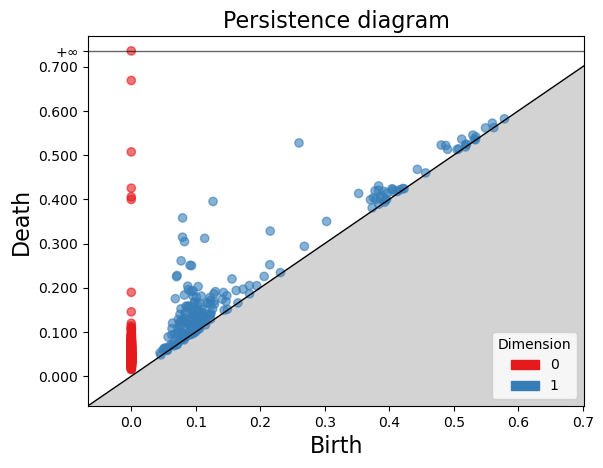

In [84]:
gd.plot_persistence_diagram(BarCodes_Rips0);